<h1 style="text-align:center">Final Exam</h1>
<h3 style="text-align:center">MCHE 485: Mechanical Vibrations<br>Spring 2018</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline

# Import the plotting functions 
import matplotlib.pyplot as plt

In [3]:
# Import the ODE solver
from scipy.integrate import odeint

# We'll also use the scipy version of the linear algebra to solve the eigenvalue problem
from scipy import linalg

# Let's also improve the printing of NumPy arrays.
np.set_printoptions(precision=3, suppress=True)

# Problem 1
The system in Figure 1 consists of a mass, $m$, connected to a frictionless pin via a massless, rigid bar of length $l$. It is also connected to an input, $x$, via viscous damper $c$. Gravity, $g$, is also acting on the system.


<ol style="list-style-type: lower-alpha;">
<li>Write the equations of motion for this system.</li>
<li>Write the *linearized* equations of motion for this system.</li> 
<li>What is the natural frequency?</li>
<li>What is the damping ratio?</li>
<li>Assume $x(t) = 0$ (*i.e.* it acts like another ground connection with respect to the mass). Write the response, $\theta(t)$, to initial conditions $\theta(0) = \theta_0$ and $\dot{\theta}(0) = \dot{\theta}_0$.
<li>Plot the response, $\theta(t)$, to the same initial conditions for damping ratios of $\zeta = 0.0$, $\zeta = 0.2$, and $\zeta = 0.7$. Be sure to clearly label the axes, indicate any important features of the responses, and differentiate between the responses.</li>
<li>Now, assume a harmonic input in $x(t)$. Write the transfer function from the amplitude of the input to the amplitude of the output.</li>
<li>Assuming $x(t) = \bar{x} \cos{\omega t}$, write the time response, $\theta(t)$.</li>
<li>Again assuming that $x(t)$ is a pure harmonic input, sketch the approximate frequency response for damping ratios of $\zeta = 0.0$, $\zeta = 0.2$, and $\zeta = 0.7$. Be sure to clearly label the axes and differentiate between the responses. Also indicate:
		<ol style="list-style-type: lower-roman; margin-top:-2px">
			<li>Magnitude and phase as $\omega$ approaches 0.</li>
			<li>Magnitude and phase as $\omega$ approaches infinity.</li>
			<li>Magnitude when $\omega$ equals the natural frequency of the system, $\omega_n$.</li>
		</ol>
</li>
</ol>

In [4]:
# Define the sytem paramters
l = 1                 # length of bar (m)
m = 1                 # mass of endpoint (kg)
g = 9.81              # accel. due to gravity (m/s^2)

# It's just a simple pendulum, so we know the natural frequency
wn = np.sqrt(g / l)   # Natural frequency (rad/s)

In [5]:
def eq_of_motion_prob1(w, t, p):
    """ 
    Defines the equations of motion for problem 1
    
    Arguments: 
      w : states of the system
      t : current timestep
      p : parameters passed 
          Here p = m, g, l, c where
          
          m : mass (kg)
          g : gravity (m/s^2)
          l : length of pendulum
          c : damping coefficient

    Returns:
      Array representing the system's differential equiations
    """
    
    m, g, l, c = p
    
    theta, theta_dot = w
    
    sys_ODE = [theta_dot,
               -g / l * theta - c * l**2 / (m * l**2) * theta_dot + c * l / (m * l**2) * x_dot(w, t, p)]
    
    return sys_ODE

def x_dot(w, t, p):
    """
    The velocity input for this system.
    
    Arguments: 
      w : states of the system
      t : current timestep
      p : parameters passed 
          Here p = m, g, l, c where
          
          m : mass (kg)
          g : gravity (m/s^2)
          l : length of pendulum
          c : damping coefficient

    Returns:
      The velocity of the input at the current timestep
    """
    
    # For the initial condition responses, this input is 0
    
    x_dot = 0.0
    
    return x_dot

#### Part e
Let's first set up the required parameters for the ODE solver and the initial conditions.

In [6]:
# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 5.0
numpoints = 5001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.,stoptime,numpoints)

# Initial conditions
theta_init = np.deg2rad(10.0)       # initial angle (rad)
theta_dot_init = np.deg2rad(20.0)        # initial angular velocity (rad/s)

x0 = [theta_init, theta_dot_init]

Now, let's generate the responses for each damping ratio, staring with $\zeta = 0$.

In [7]:
z = 0.0                   # Define a desired damping ratio
c = 2 * z * wn * m        # calculate the damping coeff. to create it (N/(m/s))

# Pack the parameters for the solver with this value of c
p = [m, g, l, c]

resp_0p0 = odeint(eq_of_motion_prob1, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

Then, $\zeta = 0.2$ and $\zeta = 0.7$.

In [8]:
# zeta = 0.2 case
z = 0.2                   # Define a desired damping ratio
c = 2 * z * wn * m        # calculate the damping coeff. to create it (N/(m/s))

# Pack the parameters for the solver with this value of c
p = [m, g, l, c]

resp_0p2 = odeint(eq_of_motion_prob1, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)


# zeta = 0.7 case
z = 0.7                   # Define a desired damping ratio
c = 2 * z * wn * m        # calculate the damping coeff. to create it (N/(m/s))

# Pack the parameters for the solver with this value of c
p = [m, g, l, c]

resp_0p7 = odeint(eq_of_motion_prob1, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

Now, plot those reponses on the same set of axes.

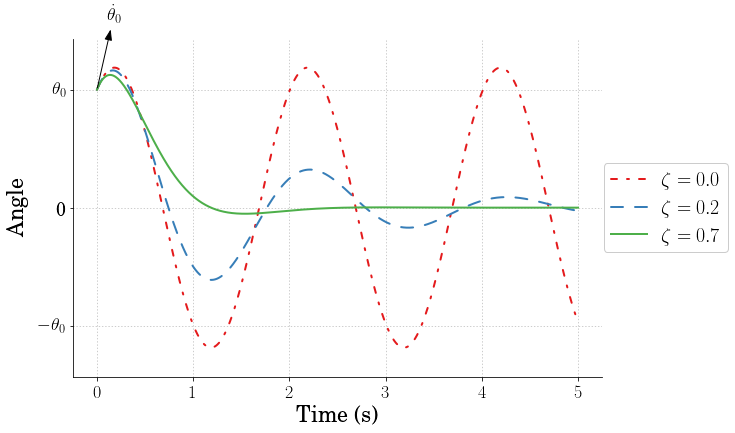

In [9]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Angle', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, resp_0p0[:,0], linewidth=2, linestyle='-.', label=r'$\zeta = 0.0$')
plt.plot(t, resp_0p2[:,0], linewidth=2, linestyle='--', label=r'$\zeta = 0.2$')
plt.plot(t, resp_0p7[:,0], linewidth=2, linestyle='-', label=r'$\zeta = 0.7$')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
plt.ylim(-0.25, 0.25)
plt.yticks([-theta_init, 0, theta_init],[r'$-\theta_0$', '0', r'$\theta_0$'])


# Annotate the requested points
plt.annotate(r'$\dot{\theta}_0$',
             xy=(0,theta_init), xycoords='data',
             xytext=(0.1, theta_init+0.1), 
             textcoords='data', 
             fontsize=18,
             arrowprops=dict(arrowstyle="<|-, head_width=0.175, head_length=0.5", 
                             connectionstyle="arc3,rad=0", 
                             color="black"),
             color = "black")



# Create the legend, then fix the fontsize
leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)


# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_Final_Prob1f_Spring2018.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

#### Part i


In [10]:
# Set up input parameters
wun = np.linspace(0,5*wn,5000)          # Frequency range for freq response plot, 0-4 Omega with 500 points in-between
w = np.linspace(0,5*wn,5000)            # Frequency range for freq response plot, 0-4 Omega with 500 points in-between

# Let's examine a few different damping ratios
z = 0.0
mag_normal_un = 1 / l * np.sqrt((2 * z * w * wn)**2  / ((wn**2 - w**2)**2 + (2 * z * w * wn)**2))
phase_un = -np.arctan2((2*z*w*wn) , (wn**2 - w**2)) * 180/np.pi

# # Let's mask the phase discontinuity, so it isn't plotted
pos = np.where(np.abs(1 - w/wn) < 1e-2)
phase_un[pos] = np.nan
wun[pos] = np.nan


z = 0.2
mag_normal_0p2 = 1 / l * np.sqrt((2 * z * w * wn)**2  / ((wn**2 - w**2)**2 + (2 * z * w * wn)**2))
phase_0p2 = -np.arctan2((2*z*w*wn) , (wn**2 - w**2)) * 180/np.pi


z = 0.7
mag_normal_0p7 = 1 / l * np.sqrt((2 * z * w * wn)**2  / ((wn**2 - w**2)**2 + (2 * z * w * wn)**2))
phase_0p7 = -np.arctan2((2*z*w*wn) , (wn**2 - w**2)) * 180/np.pi

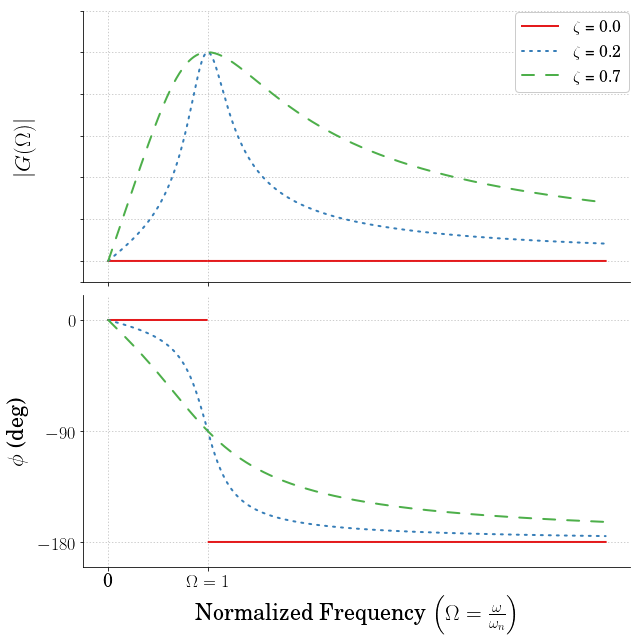

In [11]:
# Let's plot the magnitude and phase as subplots, to make it easier to compare

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $\left(\Omega = \frac{\omega}{\omega_n}\right)$',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.xticks([0,1],['0','$\Omega = 1$'])

# Magnitude plot
ax1.set_ylabel(r'$ |G(\Omega)| $',family='serif',fontsize=22,weight='bold',labelpad=40)
ax1.plot(wun/wn, mag_normal_un, linewidth=2, label=r'$\zeta$ = 0.0')
ax1.plot(w/wn, mag_normal_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax1.plot(w/wn, mag_normal_0p7, linewidth=2, linestyle = '--',label=r'$\zeta$ = 0.7')
ax1.set_ylim(-0.1, 1.2)
ax1.set_yticks([-0.1,0,0.2,0.4,0.6,0.8,1.0,1.2])
ax1.set_yticklabels('')

ax1.leg = ax1.legend(loc='upper right', fancybox=True)
ltext  = ax1.leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# Phase plot 
ax2.set_ylabel(r'$ \phi $ (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)
# ax2.plot(wnorm,TFnorm_phase*180/np.pi,linewidth=2)
ax2.plot(wun/wn, phase_un, linewidth=2, label=r'$\zeta$ = 0.0')
ax2.plot(w/wn, phase_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax2.plot(w/wn, phase_0p7, linewidth=2, linestyle = '--', label=r'$\zeta$ = 0.7')
ax2.set_ylim(-200.0,20.0,)
ax2.set_yticks([0, -90, -180])

# ax2.leg = ax2.legend(loc='upper right', fancybox=True)
# ltext  = ax2.leg.get_texts()
# plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MCHE485_Final_Prob1i_Spring2018.pdf')

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

## Problem 2
The system in Figure 2 consists of mass, $m$, connected to ground through a spring of spring constant $k$ and a damper of damping coefficient $c$. The system rests on an frictionless incline of angle $\theta$. A force, $f(t)$, acts on the mass.

<ol style="list-style-type: lower-alpha;">
<li> Write the equations of motion for this system. What is the natural frequency? What is the damping ratio?</li>
<li> Assuming $f(t)=0$, sketch the response to initial conditions $x(0)=x_0$ and $\dot{x}(0) = 0$ for damping ratios of $\zeta = 0.0$, $\zeta = 0.2$, and $\zeta = 0.7$. Be sure to clearly label the axes, indicate any important features of the responses, and differentiate between the responses.</li>
<li> Assuming $f(t) = \bar{f}e^{i\omega t}$, write the transfer function from the amplitude of the torque, $\bar{f}$, to the amplitude of the response.</li>
<li> The forcing function was determined to \textit{not} be a pure harmonic. However, a Fourier Analysis revealed that it could be adequately approximated as a linear combination of two pure harmonics, such that:<br>

		<br>$$ f(t) \approx \bar{f}_1 \sin(\omega_1 t) + \bar{f}_2 \sin(\omega_2 t) $$<br>

where neither of the input frequencies match the natural frequency of the system ($\omega_1 \neq \omega_2 \neq \omega_n $). Write the time response, $x(t)$, to this approximation of the input.</li>
</ol>

Now, the viscous damper is removed and the energy dissipation in the system modeled via friction with the incline with coefficient of friction, $\mu$, as shown in Figure 3.
<ol style="list-style-type: lower-alpha;" start=5>
<li>Write the equations of motion for this system.</li>
<li>Assuming $f(t)=0$, sketch the response to initial conditions $x(0)=x_0$ and $\dot{x}(0) = 0$. Be sure to clearly label the axes, indicate any important features of the response, and to differentiate the response from the response with viscous damping that you sketched in part b. of this problem.</li>
<li>Does the angle of the incline affect how quickly the system response decays? Why or why not? If possible, support your answer via analysis of the equations of motion.</li>
</ol>


<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_DirectForce_Ramp.png" alt="A Mass-Spring-Damper System on an Incline" width=35%><br>
    <strong>Figure 2: A Mass-Spring-Damper System on an Incline</strong>
</p>

#### Part b

In [12]:
# Define the System Parameters
m = 1.0                 # kg
k = (2.0 * np.pi)**2    # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k / m)     # Natural Frequency (rad/s)

# Initial Conditions
x_init = 1.0            # Initial Position (m)
x_dot_init = 0.0        # Initial velocity (m/s)

x0 = [x_init, x_dot_init]

# And ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 5.0
numpoints = 5001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.,stoptime,numpoints)

In [13]:
# Define the system as a series of 1st order ODES (beginnings of state-space form)
def eq_of_motion_prob2b(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x, x_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m, k, mu, g]
    """
    x, x_dot = w
    m, k, c = p

    # Create sysODE = (x', x_dot'):
    sysODE = [x_dot,
             (-k * x - c * x_dot) / m]
    return sysODE

In [14]:
z = 0.0                   # Define a desired damping ratio
c = 2 * z * wn * m        # calculate the damping coeff. to create it (N/(m/s))

# Pack the parameters for the solver with this value of c
p = [m, k, c]

resp_0p0 = odeint(eq_of_motion_prob2b, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)


# zeta = 0.2 case
z = 0.2                   # Define a desired damping ratio
c = 2 * z * wn * m        # calculate the damping coeff. to create it (N/(m/s))

# Pack the parameters for the solver with this value of c
p = [m, k, c]

resp_0p2 = odeint(eq_of_motion_prob2b, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)


# zeta = 0.7 case
z = 0.7                   # Define a desired damping ratio
c = 2 * z * wn * m        # calculate the damping coeff. to create it (N/(m/s))

# Pack the parameters for the solver with this value of c
p = [m, k, c]

resp_0p7 = odeint(eq_of_motion_prob2b, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

Now, let's plot those responses.

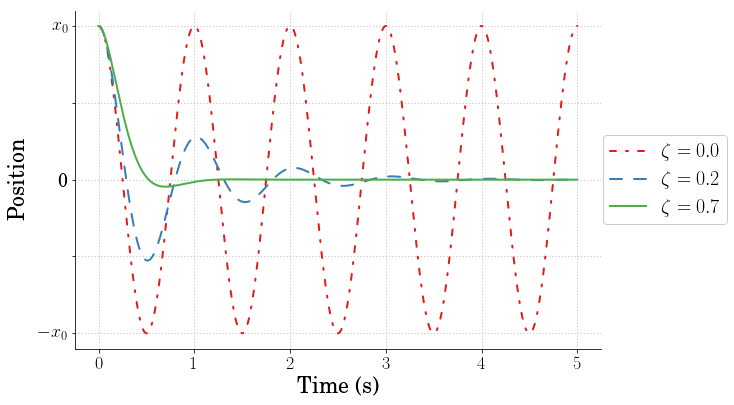

In [15]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, resp_0p0[:,0], linewidth=2, linestyle='-.', label=r'$\zeta = 0.0$')
plt.plot(t, resp_0p2[:,0], linewidth=2, linestyle='--', label=r'$\zeta = 0.2$')
plt.plot(t, resp_0p7[:,0], linewidth=2, linestyle='-', label=r'$\zeta = 0.7$')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(-0.25, 0.25)
plt.yticks([-x_init, -x_init/2, 0, x_init/2, x_init],[r'$-x_0$', '', '0', '', r'$x_0$'])


# Create the legend, then fix the fontsize
leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)


# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_Final_Prob2b_Spring2018.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

#### Part f

In [16]:
# Define the System Parameters
m = 1.0                    # kg
k = (2.0 * np.pi)**2       # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k / m)        # Natural Frequency (rad/s)
mu = 0.1                   # Coefficient of Friction
theta = np.deg2rad(15.0)   # Angle of the incline (rad)
g = 9.81                   # Accel due to gravity (m/s^2)

# Pack up the parameters
p = m, k, mu, g, theta

# Set up the intial conditions
x_init = 1.0            # Initial Position (m)
x_dot_init = 0.0        # Initial velocity (m/s)

x0 = [x_init, x_dot_init]

# And set up the ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 5.0
numpoints = 5001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.,stoptime,numpoints)

In [17]:
# Define the system as a series of 1st order ODES (beginnings of state-space form)
def eq_of_motion_prob2f(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x, x_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m, k, mu, g]
    """
    x, x_dot = w
    m, k, mu, g, theta = p

    # Create sysODE = (x', x_dot'):
    sysODE = [x_dot,
             (-k * x - mu*m*g*np.cos(theta)*np.sign(x_dot)) / m]
    return sysODE

In [18]:
resp_fric = odeint(eq_of_motion_prob2f, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

# Find the location of the last cycle peaks - we'll use to plot the linear decay envelope
last_min = np.min(resp_fric[:,0] * (t > 4.2))
last_min_t = t[np.argmin(resp_fric[:,0] * (t > 4.2))]
last_max = np.max(resp_fric[:,0] * (t > 4.2))
last_max_t = t[np.argmax(resp_fric[:,0] * (t > 4.2))]

Now, let's plot that response.

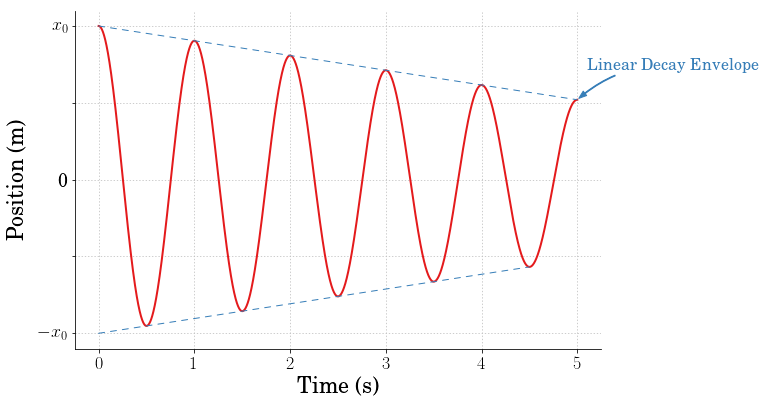

In [19]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Time (s)',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',fontsize=22,weight='bold',labelpad=10)
plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ['', r'$-x_0$', '', '0', '', r'$x_0$', ''])

# plot the response
plt.plot(t,resp_fric[:,0],linewidth=2)

# Add the (linear) decay envelopes
plt.plot([0., last_max_t], [x_init, last_max], color = "#377eb8", linewidth=1.0, linestyle="--")
plt.plot([0., last_min_t], [-x_init, last_min], color = "#377eb8", linewidth=1.0, linestyle="--")

plt.annotate(r'Linear Decay Envelope',
         xy=(t[-1],resp_fric[-1,0]), xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3,rad=.2", color="#377eb8"),color = "#377eb8")

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MCHE485_Final_Prob2f_Spring2018.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

#### Part g
We'll vary the angle of the incline to observe the slower dissipation (decay) of the oscillation as the incline angle increases.

In [20]:
mu = 0.2 # A larger mu will make this effect more prominent

# 0 degrees
theta = np.deg2rad(0.0)

# Pack up the parameters
p = m, k, mu, g, theta
resp_fric_0deg = odeint(eq_of_motion_prob2f, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)


# 30 degrees
theta = np.deg2rad(30.0)  

# Pack up the parameters
p = m, k, mu, g, theta
resp_fric_30deg = odeint(eq_of_motion_prob2f, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)


# 60 degrees
theta = np.deg2rad(60.0)  

# Pack up the parameters
p = m, k, mu, g, theta
resp_fric_60deg = odeint(eq_of_motion_prob2f, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

# 90 degrees
theta = np.deg2rad(90.0)  

# Pack up the parameters
p = m, k, mu, g, theta
resp_fric_90deg = odeint(eq_of_motion_prob2f, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

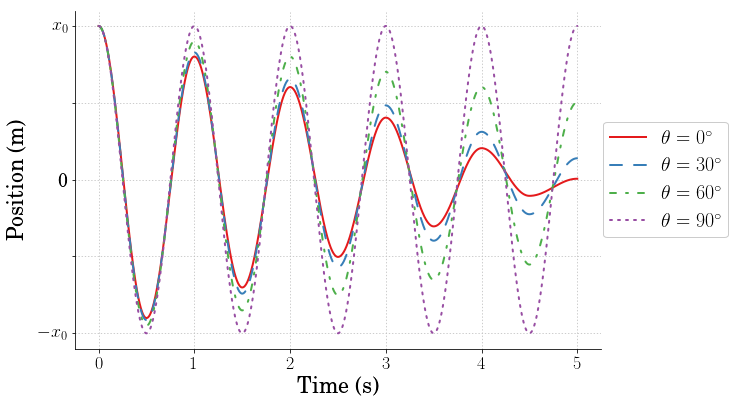

In [21]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Time (s)',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',fontsize=22,weight='bold',labelpad=10)
plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ['', r'$-x_0$', '', '0', '', r'$x_0$', ''])

plt.plot(t, resp_fric_0deg[:,0], linewidth=2, linestyle='-', label=r'$\theta = 0^\circ$')
plt.plot(t, resp_fric_30deg[:,0], linewidth=2, linestyle='--', label=r'$\theta = 30^\circ$')
plt.plot(t, resp_fric_60deg[:,0], linewidth=2, linestyle='-.', label=r'$\theta = 60^\circ$')
plt.plot(t, resp_fric_90deg[:,0], linewidth=2, linestyle=':', label=r'$\theta = 90^\circ$')


# Create the legend, then fix the fontsize
leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MCHE485_Final_Prob2g_Spring2018.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

### Problem 3
The model in Figure 3 could be used as a rough model for a robotic gripper. The *fingers* of the gripper are modeled as masses, $m$, attached to the end of a rigid, massless bars of length $l$. The angles of the two fingers are represented by $\theta_1$ and $\theta_2$ and both are attached to perfect, frictionless pins.  Pure torques $\tau_1$ and $\tau_2$ at that pin joint control the gripper. The object being gripped is modeled as a mass, $m_3$, constrained to move on a frictionless surface. The interaction between the gripper *fingers* and the object is modeled via springs of spring constant $k$ and dampers of damping coefficient $c$.

<ol style="list-style-type: lower-alpha;">
    <li> Write the equations of motion for this model in matrix form.</li>
    <li> Assuming there is no damping ($c = 0$), set up and explain the solution procedure to find the natural frequencies and mode shapes. You do not need to solve the complete problem, but all necessary information and steps must be clearly defined.</li>
    <li>Do you expect there to be a rigid-body mode? Why or why not?</li>
    <li>For a given set of parameters, the natural frequencies and mode shapes were found to be:<br>
    
$\quad \omega_1 = 0.00 \mbox{ rad/s} \quad X_1 = [0.378 \ \ 0.378  \ \ 0.378]^T$<br>


$\quad \omega_2 = 1.00 \mbox{ rad/s} \quad X_2 = [-0.707 \ \ 0.000  \ \ 0.707]^T$    


$\quad \omega_3 = 1.18 \mbox{ rad/s} \quad X_3 = [-0.598 \ \  0.239 \ \ -0.598]^T$    
    
Assuming that these are correct, plot (on separate sets of properly labeled axes) the approximate time responses, $\theta_1(t)$, $\theta_2(t)$, and $x(t)$, to the initial conditions:
<ol style="list-style-type: lower-roman; margin-top:-2px">
		<li>$x_1(0) = x_2(0) = x_3(0) = x_0$ and all initial velocities are zero.</li>
		<li>$x_1(0) = x_2(0) = x_3(0) = 0$ and $\dot{x}_1(0) = v_0$, $\dot{x}_2(0) = 0$, and $\dot{x}_3(0) = -v_0$</li>
		<li>$x_1(0) = x_2(0) = x_3(0) = 0$ and $\dot{x}_1(0) = v_0$, $\dot{x}_2(0) = v_0 + \epsilon$, and $\dot{x}_3(0) = v_0$, where $\epsilon$ is a small positive number.</li>
    </ol>
    </li>
	<li>Now, $c\neq 0$. Will the mode shapes change? Why or why not?</li>
	<li>Set up and explain the solution procedure to find the natural frequencies and mode shapes for the damped case ($c \neq 0$). You do not need to solve the complete problem, but all necessary information and steps must be clearly defined.</li>

In [22]:
m = 1.0               # Mass of gripper fingers (kg)
l = 0.1               # Length of gripper fingers (m)
m3 = 2.0              # Mass of object being gripped (kg)
k = (2*np.pi)**2      # Compliance of object being gripped (N/m)

In [23]:
# Define the mass and stiffness matrices
M = np.asarray([[m * l**2, 0       , 0],
                [0,        m * l**2, 0],
                [0,        0       , m3]])

K = np.asarray([[k * l**2, 0,        -k * l],
                [0,        k * l**2, -k * l],
                [-k * l,   -k * l,   2 * k]])

In [24]:
eigenvals, eigenvects = linalg.eigh(K,M)

In [25]:
print('\n')
print('The resulting eigenalues are {:.2f}, {:.2f}, and {:.2f}.'.format(eigenvals[0], eigenvals[1], eigenvals[2]))
print('\n')
print('So the two natural frequencies are {:.2f}rad/s, {:.2f}rad/s, and {:.2f}rad/s.'.format(np.sqrt(eigenvals[0]), np.sqrt(eigenvals[1]), np.sqrt(eigenvals[2])))
print('\n')



The resulting eigenalues are 0.00, 39.48, and 78.96.


So the two natural frequencies are 0.00rad/s, 6.28rad/s, and 8.89rad/s.




In [26]:
print('\n')
print('The first eigenvector is ' + str(eigenvects[:,0]) + '.')
print('\n')
print('The second eigenvector is ' + str(eigenvects[:,1]) + '.')
print('\n')
print('The third eigenvector is ' + str(eigenvects[:,2]) + '.')
print('\n')



The first eigenvector is [-5.  -5.  -0.5].


The second eigenvector is [ 7.071 -7.071  0.   ].


The third eigenvector is [-5.  -5.   0.5].




#### Part d

In [27]:
def eq_of_motion_prob3(w, t, p):
    """ 
    Defines the undamped equations of motion for problem 3d
    
    Arguments: 
      w : states of the system
      t : current timestep
      p : parameters passed 
          Here p = m, m3, l where
          
          m : mass (kg) of gripper finger
          m3 : mass (kg) of object
          g : gravity (m/s^2)
          l : length of pendulum

    Returns:
      Array representing the system's differential equiations
    """
    
    m, m3, l = p
    
    theta1, theta1_dot, theta2, theta2_dot, x, x_dot = w
    
    # Define the moments of inertia to simplify writing the equations of motion
    I1 = m * l**2
    I2 = m * l**2
    
    sys_ODE = [theta1_dot,
               -k * l**2 / I1 * theta1 + k * l / I1 * x + tau_1(w, t, p) / I1,
               theta2_dot, 
               -k * l**2 / I2 * theta2 + k * l / I2 * x + tau_2(w, t, p) / I2,
               x_dot,
               -2 * k/m3 * x + k * l / m3 * theta1 + k * l / m3 * theta2]

    return sys_ODE


def tau_1(w, t, p):
    """ 
    Defines the torque tau_1 as a function of time     
    For this problem, it's always 0
    """
    
    return 0

def tau_2(w, t, p):
    """ 
    Defines the torque tau_2 as a function of time     
    For this problem, it's always 0
    """
    
    return 0

In [28]:
# Pack up the parameters
p = m, m3, l

# And define the initial conditions
theta1_init = np.deg2rad(10.0)
theta1_dot_init = 0.0
theta2_init = np.deg2rad(-10.0)
theta2_dot_init = 0.0
x_init = 0.0            # Initial Position (m)
x_dot_init = 0.0        # Initial velocity (m/s)

x0 = [theta1_init, theta1_dot_init, theta2_init, theta2_dot_init, x_init, x_dot_init]

# And set up the ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 5.0
numpoints = 5001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

In [29]:
gripper_resp = odeint(eq_of_motion_prob3, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

Now, let's plot the reponse. We'll plot the angles, $\theta_1$ and $\theta_2$, and the motion of $m_3$ on separate axes.

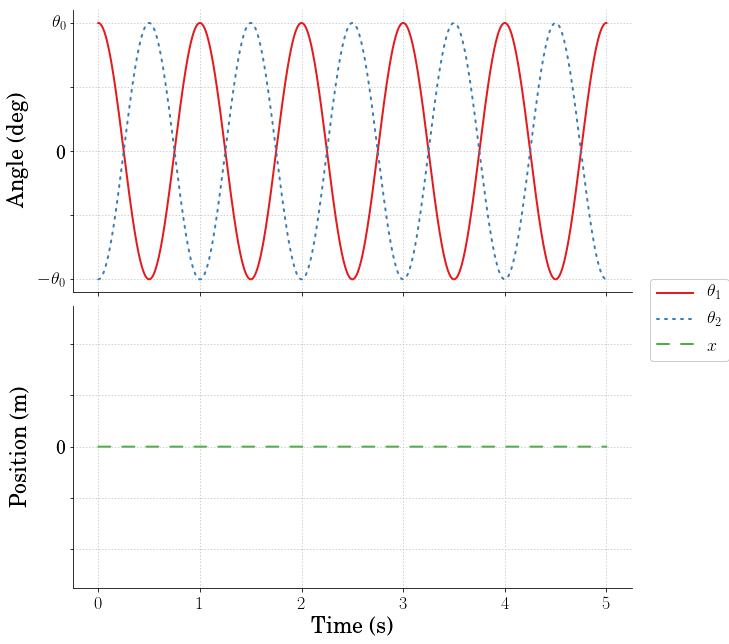

In [30]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax1.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax1.get_xmajorticklabels(),family='serif',fontsize=18)
plt.setp(ax2.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax2.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)

# Magnitude plot
ax1.set_ylabel(r'Angle (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)
theta1_plot = ax1.plot(t, np.rad2deg(gripper_resp[:,0]), linewidth=2, label=r'$\theta_1$')
theta2_plot = ax1.plot(t, np.rad2deg(gripper_resp[:,2]), linewidth=2, linestyle = ':', label=r'$\theta_2$')
# ax1.set_ylim(-10, 10)
ax1.set_yticks([-10,-5,0,5,10])
ax1.set_yticklabels([r'$-\theta_0$', '', '0', '', r'$\theta_0$'])

# ax1.leg = ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
# ltext  = ax1.leg.get_texts()
# plt.setp(ltext,family='Serif',fontsize=16)

# Phase plot 
ax2.set_ylabel(r'Position (m)',family='serif', fontsize=22, weight='bold',labelpad=25)
# ax2.plot(wnorm,TFnorm_phase*180/np.pi,linewidth=2)
x_plot = ax2.plot(t, gripper_resp[:,4], linewidth=2, linestyle = '--', color='#4daf4a', label=r'$x$')
# ax2.set_ylim(-200.0,20.0,)
ax2.set_yticks([-0.04, -0.02, 0, 0.02, 0.04])
ax2.set_yticklabels(['', '', '0', '', ''])

# ax2.leg = ax2.legend(loc='upper right', fancybox=True)
# ltext  = ax2.leg.get_texts()
# plt.setp(ltext,family='Serif',fontsize=16)

leg = fig.legend(handles=(theta1_plot[0], theta2_plot[0], x_plot[0]), 
           labels=(r'$\theta_1$', r'$\theta_2$', r'$x$'), 
           loc='center left', 
           bbox_to_anchor=(1.0, 0.5),
           fancybox=True)

ltext  = leg.get_texts()
plt.setp(ltext, family='Serif', fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MCHE485_Final_Prob3di_Spring2018.pdf')

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

#### Part d.ii.

In [31]:
# Pack up the parameters
p = m, m3, l

# And define the initial conditions
theta1_init = np.deg2rad(0.0)
theta1_dot_init = np.deg2rad(1.0)
theta2_init = np.deg2rad(0.0)
theta2_dot_init = np.deg2rad(1.0)
x_init = 0.0                         # Initial Position (m)
x_dot_init = -0.11                    # Initial velocity (m/s)

x0 = [theta1_init, theta1_dot_init, theta2_init, theta2_dot_init, x_init, x_dot_init]

# And set up the ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 5.0
numpoints = 5001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

In [32]:
gripper_resp = odeint(eq_of_motion_prob3, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

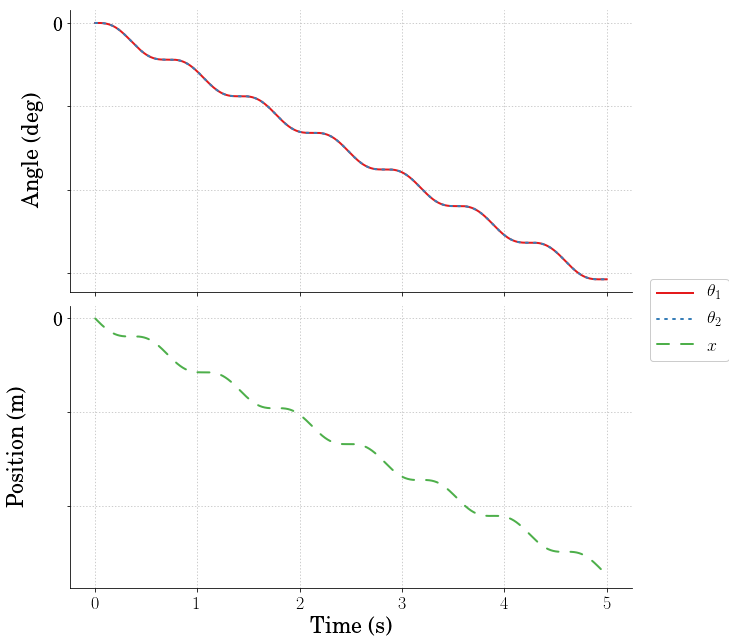

In [33]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax1.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax1.get_xmajorticklabels(),family='serif',fontsize=18)
plt.setp(ax2.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax2.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)

# Magnitude plot
ax1.set_ylabel(r'Angle (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)
theta1_plot = ax1.plot(t, np.rad2deg(gripper_resp[:,0]), linewidth=2, label=r'$\theta_1$')
theta2_plot = ax1.plot(t, np.rad2deg(gripper_resp[:,2]), linewidth=2, linestyle = ':', label=r'$\theta_2$')

ax1.set_yticks([-150, -100, -50, 0])
ax1.set_yticklabels([r'', '', '', '0'])

# ax1.leg = ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
# ltext  = ax1.leg.get_texts()
# plt.setp(ltext,family='Serif',fontsize=16)

# Phase plot 
ax2.set_ylabel(r'Position (m)',family='serif', fontsize=22, weight='bold',labelpad=25)
# ax2.plot(wnorm,TFnorm_phase*180/np.pi,linewidth=2)
x_plot = ax2.plot(t, gripper_resp[:,4], linewidth=2, linestyle = '--', color='#4daf4a', label=r'$x$')

ax2.set_yticks([-0.2, -0.1, 0])
ax2.set_yticklabels(['', '', '0'])

# ax2.leg = ax2.legend(loc='upper right', fancybox=True)
# ltext  = ax2.leg.get_texts()
# plt.setp(ltext,family='Serif',fontsize=16)

leg = fig.legend(handles=(theta1_plot[0], theta2_plot[0], x_plot[0]), 
           labels=(r'$\theta_1$', r'$\theta_2$', r'$x$'), 
           loc='center left', 
           bbox_to_anchor=(1.0, 0.5),
           fancybox=True)

ltext  = leg.get_texts()
plt.setp(ltext, family='Serif', fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MCHE485_Final_Prob3dii_Spring2018.pdf')

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

In [34]:
# Set up input parameters
wun = np.linspace(0,5,500)          # Frequency range for freq response plot, 0-4 Omega with 500 points in-between
w = np.linspace(0,5,500)            # Frequency range for freq response plot, 0-4 Omega with 500 points in-between

# Define the normalized transfer function for several different damping ratios
z = 0.0;
mag_normal_un = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_un = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi

# Let's mask the discontinuity in the undamped phase response
# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(1-w) <= 1e-2)
phase_un[pos] = np.nan

z = 0.2;
mag_normal_0p2 = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_0p2 = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi

z = 0.7;
mag_normal_0p7 = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_0p7 = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi

### Problem 4
<p style="text-align:center">
	<img src="http://shared.crawlab.org/RotatingImbalance.png" alt="A Mass-Spring-Damper System with a Rotating Imbalance" width=35%/></a><br>
    <strong> Figure 4: A Mass-Spring-Damper System with a Rotating Imbalance</strong>
</p>


#### Part a
This is a straightforward, "textbook" rotating imbalance problem. The equation of motion for the system is:

$ \quad \left(m_1 + m_2\right) \ddot{x} + c \dot{x} + kx = m_2 e \omega^2 \cos{\omega t} $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$, by dividing by $(m_1 + m_2)$.

$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = e \beta \omega^2 \cos{\omega t}$.

where

$ \quad \beta = \frac{m_2}{m_1 + m_2} $, $ \quad \omega_n^2 = \frac{k}{m_1 + m_2} $, and $ \quad 2 \zeta \omega_n = \frac{c}{m_1 + m_2}$.    

We can then write the response as:

$ \quad x(t) = \frac{e \beta \omega^2}{\sqrt{\left(\omega_n^2 - \omega^2\right)^2 + \left(2 \zeta \omega \omega_n \right)^2}} \cos{\left(\omega t - \phi\right)}$

where

$ \quad \phi = \tan^{-1}\left(\frac{2 \zeta \omega \omega_n}{\omega_n^2 - \omega^2}\right) $

In [35]:
# Define the system pararmeters
k = 2*(2*np.pi)**2            # Spring constant (N/m)
m1 = 1.75                     # Sprung/main mass (kg)
m2 = 0.25                     # rotating mass (kg)
b = m2/(m1 + m2)              # mass ratio    
wn = np.sqrt(k/(m1 + m2))     # natural frequency (rad/s)
l = 0.1                       # Eccentricity


z = 0.1                       # Damping Ratio
c = 2*z*wn*(m1 + m2)          # Select c based on desired amping ratio

In [36]:
# Set up the frequency range
w = np.linspace(0,5*wn,2000)            # Freq range, 0-5*wn with 2000 points in-between

# Look at undamped case
z = 0.0
x_mag_un = (l * b * w**2) / np.sqrt((wn**2 - w**2)**2 + (2 * z * w * wn)**2)


# Look at z=0.2
z = 0.2
x_mag_0p2 = (l * b * w**2) / np.sqrt((wn**2 - w**2)**2 + (2 * z * w * wn)**2)


# Look at z=0.2
z = 0.7
x_mag_0p7 = (l * b * w**2) / np.sqrt((wn**2 - w**2)**2 + (2 * z * w * wn)**2)

w = w/wn # Scale frequency so the plot is normalized by the natural frequency

Now, let's plot those frequency responses, annotating the trends at the points requested.

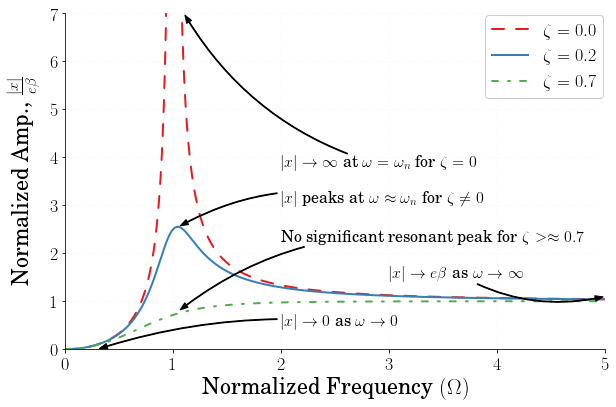

In [37]:
# Let's plot the magnitude of the frequency response

fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.95')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $(\Omega)$',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'Normalized Amp., $\frac{|x|}{e \beta}$',family='Serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(w, x_mag_un/(l*b),  linewidth=2, linestyle = '--',  label=r'$\zeta = 0.0$')
plt.plot(w, x_mag_0p2/(l*b), linewidth=2, linestyle = '-', label=r'$\zeta = 0.2$')
plt.plot(w, x_mag_0p7/(l*b), linewidth=2, linestyle = '-.', label=r'$\zeta = 0.7$')

# Annotate the requested points
plt.annotate(r'$|x| \rightarrow e \beta$ as $\omega \rightarrow \infty$',
             xy=(5,1.1), xycoords='data',
             xytext=(3, 1.5), textcoords='data', fontsize=16,
             arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3,rad=.2", color="black"),color = "black")

plt.annotate(r'$|x| \rightarrow 0$ as $\omega \rightarrow 0$',
             xy=(0.3,0), xycoords='data',
             xytext=(2, 0.5), textcoords='data', fontsize=16,
             arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3,rad=0.1", color="black"),color = "black")

plt.annotate(r'$|x|$ peaks at $\omega \approx \omega_n$ for $\zeta \neq 0$',
             xy=(1.05,np.max(x_mag_0p2/(l*b))), xycoords='data',
             xytext=(2, 3), textcoords='data', fontsize=16,
             arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3,rad=.2", color="black"),color = "black")

plt.annotate(r'$|x|\rightarrow \infty$ at $\omega = \omega_n$ for $\zeta = 0$',
             xy=(1.1,7), xycoords='data',
             xytext=(2, 3.75), textcoords='data', fontsize=16,
             arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3,rad=-.2", color="black"),color = "black")

plt.annotate(r'No significant resonant peak for $\zeta > \approx0.7$',
             xy=(1.05,np.max(x_mag_0p7[450]/(l*b))), xycoords='data',
             xytext=(2, 2.25), textcoords='data', fontsize=16,
             arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3,rad=.2", color="black"),color = "black")



# Adjust the axis limits
plt.xlim(0,5)
plt.ylim(0,7)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MCHE485_Final_Prob4b_Spring2018.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [38]:
# This cell will just improve the styling of the notebook
# You can ignore it, if you are okay with the default sytling
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))